In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

__1.__ Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]


In [3]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [4]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8, log=True, show_mse=True):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if log == True and i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if show_mse==True:
      print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

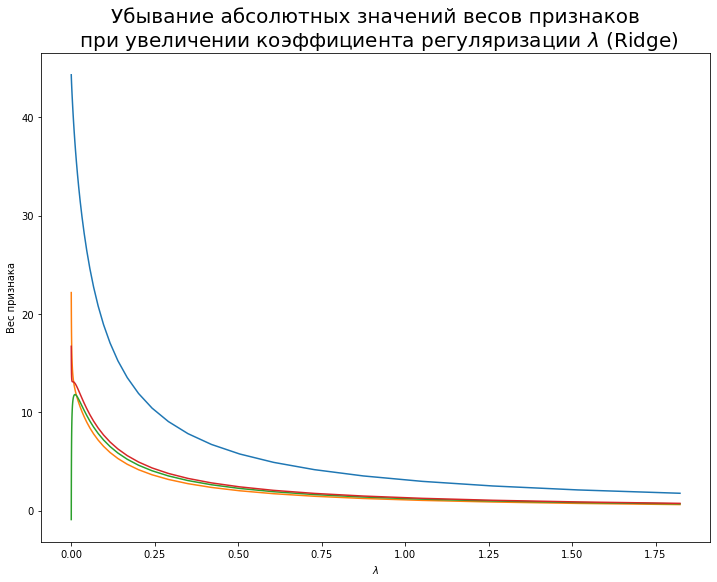

In [5]:
n = 70
coeffs = np.zeros((n, X_norm.shape[1]))
lambda_list = np.logspace(-5, 0.5, n)

for i, num in enumerate(lambda_list):
    w = gradient_descent_reg_l2(X_norm, y, iterations=8000, eta=3e-2, reg=num, log=False, show_mse=False)
    coeffs[i, :] = w

plt.figure(figsize = (12, 9))
for i in range(X_norm.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации $\lambda$ (Ridge)', size=20)
# plt.xticks(np.arange(0, 10))
plt.xlabel('$\lambda$')
plt.ylabel('Вес признака');

При увеличении коэффициента регуляризации веса признаков уменьшаются и становятся близкими к нулю.

__2.__ Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [6]:
def gradient_descent_reg_l1(X, y, iterations, learning_rate=0.03, reg=0.1, log=True, show_mse=True):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        W -= learning_rate * ((2/n)* X.T @ (y_pred - y)) + reg * np.sign(W)
        
        if log == True and i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if show_mse==True:
      print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return np.around(W, decimals=2)

gradient_descent_reg_l1(X_norm, y, iterations=8000, learning_rate=0.03, reg=0.1)

Iter: 0, weights: [2.50889841 1.285986   2.34685855 1.57242727], error 3399.4171351405093
Iter: 800, weights: [46.86588046  7.02575733  1.75808082 15.0177933 ], error 44.801758361296045
Iter: 1600, weights: [4.68656590e+01 6.58227937e+00 3.92525055e-02 1.70358553e+01], error 44.5507154150139
Iter: 2400, weights: [46.89284236  6.2680269   0.16231577 17.24093808], error 44.42062885459799
Iter: 3200, weights: [46.89291209  6.18338769  0.07128153 17.28820995], error 44.840367082169514
Iter: 4000, weights: [46.9049429   6.16773136  0.18916458 17.30842778], error 45.0440030387894
Iter: 4800, weights: [46.89518678  6.15738948  0.0937787  17.30524574], error 44.78989461323865
Iter: 5600, weights: [4.69022014e+01 6.15929885e+00 8.43315782e-03 1.73104365e+01], error 45.014324739307774
Iter: 6400, weights: [46.89535116  6.15579846  0.11519995 17.30655998], error 44.721327511592655
Iter: 7200, weights: [4.68993001e+01 6.15728325e+00 2.76693464e-02 1.73086053e+01], error 44.97652242481205
Final MSE

array([46.9 ,  6.16,  0.15, 17.31])

In [7]:
def gradient_descent_reg_l1(X, y, iterations, eta=0.03, reg=0.1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

gradient_descent_reg_l1(X_norm, y, iterations=10000, eta=0.04, reg=0.1)

Iter: 0, weights: [3.11304535 1.72945875 1.17129512 1.34333619], error 3593.367626078301
Iter: 1000, weights: [44.24715037 19.53562754  4.12769515 14.1229763 ], error 25.422727646667703
Iter: 2000, weights: [44.32720842 21.11260521  0.82600595 15.73842208], error 24.99483684400737
Iter: 3000, weights: [4.43316914e+01 2.14459745e+01 4.59312890e-03 1.62398500e+01], error 24.943828672852103
Iter: 4000, weights: [ 4.43316120e+01  2.14454823e+01 -1.74227933e-03  1.62401572e+01], error 24.94375102990302
Iter: 5000, weights: [ 4.43315694e+01  2.14454026e+01 -3.92539473e-05  1.62401497e+01], error 24.943657868472805
Iter: 6000, weights: [4.43315583e+01 2.14454185e+01 1.67802089e-03 1.62401885e+01], error 24.94354630882787
Iter: 7000, weights: [4.43315356e+01 2.14453712e+01 3.31067324e-03 1.62401163e+01], error 24.943461335163313
Iter: 8000, weights: [4.43316222e+01 2.14454341e+01 5.10724926e-03 1.62402067e+01], error 24.943823019421
Iter: 9000, weights: [ 4.43315371e+01  2.14453626e+01 -1.3247

array([4.43314663e+01, 2.14453449e+01, 2.19950573e-03, 1.62400849e+01])

In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(X_norm, y)
lasso.coef_

array([44.41337559, 20.96548335,  0.        , 16.27892409])

__3*.__ Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
- думаю, что нет, потому что мы приводим данные к разным диапазонам заначений. При нормализации данные приводятся к диапазону от 0 до 1, а при стандартизации приводится к стандартному нормальному распределению с отклонением 1 (могут быть отрицательные тоже), так, так что после применения одного из методов масштабирования данные уже приведены к определенному диапазону. (Не уверена, что правильно рассуждаю=))

In [9]:
X_norm_stand = X_norm.copy()
X_norm_stand = X_norm_stand.astype(np.float64)
X_norm_stand[:, 1] = standard_scale(X_norm_stand[:, 1])
X_norm_stand[:, 2] = standard_scale(X_norm_stand[:, 2])
X_norm_stand[:, 3] = standard_scale(X_norm_stand[:, 3])
X_norm_stand

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

__4*.__ Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [10]:
from sklearn.datasets import make_regression

# сгенерируем набор данных
X, y, coef = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, 
                                      noise=3, coef=True, random_state=2)
X[:, 0] *= 10
display(X, y, coef)

array([[ 1.80409807e+00,  5.53164274e-01],
       [-2.76179492e+00, -5.16883894e-01],
       [-4.62005348e+00,  3.50888494e-01],
       [ 3.96520159e+00, -3.14617436e-01],
       [-1.02141473e+01,  4.32395701e-01],
       [-3.13508197e+00,  7.71011738e-01],
       [-1.45336435e+01, -3.38017777e-01],
       [-4.16757847e+00, -5.62668272e-02],
       [ 1.24823646e+00,  7.56502143e-01],
       [ 1.00036589e+01, -3.81092518e-01],
       [-1.73795950e+01,  1.04082395e+00],
       [-1.54667461e+01, -2.08265194e+00],
       [ 2.04207979e+00,  1.40669624e+00],
       [-2.13619610e+01,  1.64027081e+00],
       [ 4.33496330e+00,  1.27837923e+00],
       [ 2.41439629e+00,  4.97425649e-01],
       [-2.69056960e+00,  2.23136679e+00],
       [-3.25049628e+00, -5.60234506e-01],
       [-9.02246068e+00, -5.90972275e-01],
       [-1.41881055e+01, -2.51774118e-01],
       [ 6.95119605e+00, -2.03346655e+00],
       [-1.09873895e+01,  1.58448706e+00],
       [-6.53250268e+00,  8.42456282e-01],
       [ 1.

array([  19.34585659,  -14.02013032,  -13.19126078,   12.57381019,
        -33.73466164,    2.17305413,  -60.49292954,  -17.31756415,
         18.23574923,   32.40885147,  -48.6258274 ,  -97.99074637,
         34.39861918,  -47.59281178,   42.00851498,   17.64555454,
         30.44055372,  -22.77361991,  -43.88675242,  -61.7178349 ,
        -15.8658487 ,  -13.81612152,   -4.37547891,   59.5570899 ,
         27.07757647,    2.31952919,  -54.50187077,  -12.3756807 ,
         35.24896435,   72.84667257,  -25.79656444,  171.19505662,
        -37.14744897,   77.92160228,    6.8953074 ,  -42.80726899,
         50.08402068,  -30.36943557,  -11.33731341,   53.75420262,
        -36.66187072,  -40.54641897,   14.67173947,   42.16914716,
          4.51373379,  -11.91089597,  -79.93975205,  -46.31721406,
          3.12037822,   62.05301858,   35.82853218,  -13.93202325,
         25.55920228,  -58.51471651,  -89.04612817,   16.10508535,
         42.08275425,   20.11899966,  -37.17415197,  -17.75209

array([38.07925837, 17.83098278])

In [11]:
def gradient_descent(X, y, learning_rate=1e-3, max_iter=10000, log=True):
    """Алгоритм градиентного спуска, завершающий работу, когда веса перестают менятся"""
    e = 1e-7
    dist = np.inf
    w = np.array([1, 0.5])
    i = 0
    errors = []
    while dist > e and i < max_iter:
        y_pred = np.dot(X,w)
        dQ = 2 / len(y) * np.dot(X.T, y_pred - y)
        W = w - learning_rate * dQ
        dist = np.linalg.norm(W - w, ord=2)
        err = calc_mse(y, y_pred)
        errors.append(err)
        if log == True and i % 10 == 0:
            print(f'Iter {i}: MSE - {err}, weights: {W}')
        i += 1
        w = W
    return w, np.array(errors)

def stochastic_gradient_descent(X, y, learning_rate=1e-3, max_iter=10000, log=True):
    """Алгоритм стохастического градиентного спуска, завершающий работу, когда веса перестают менятся"""
    e = 1e-7
    dist = np.inf
    w = np.array([1, 0.5])
    i = 0
    errors = []
    np.random.seed(1234)
    while dist > e and i < max_iter:
        train_ind = np.random.randint(X.shape[0], size=1)
        y_pred = np.dot(X[train_ind], w)

        #         dQ = 2 / len(y) * np.dot(X.T, y_pred - y)
        # W = w - learning_rate * dQ

        W = w - learning_rate * 2 / y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - y[train_ind])
        dist = np.linalg.norm(W - w, ord=2)
        err = calc_mse(y[train_ind], y_pred)
        errors.append(err)
        if log == True and i % 10 == 0:
            print(f'Iter {i}: MSE - {err}, weights: {W}')
        i += 1
        w = W
    return w, np.array(errors)

In [13]:
%%time
w_sdg, errors_sgd = stochastic_gradient_descent(X, y, 
                                                learning_rate=0.00069, 
                                                max_iter=800
                                                ,log=False
                                                )

CPU times: user 52.4 ms, sys: 925 µs, total: 53.3 ms
Wall time: 57.8 ms


In [14]:
errors_sgd

array([1.01861288e+03, 8.77716965e-01, 1.62827822e+01, 1.18983297e+03,
       6.55354467e+02, 1.17245003e+02, 1.13668938e+02, 5.83276748e+02,
       1.27329112e+00, 3.65966376e+02, 1.50909695e+02, 2.62786901e+00,
       1.42938841e+02, 2.12374122e+02, 6.24155120e+00, 3.63032203e+02,
       7.62322271e-01, 7.21438697e+01, 3.92666530e+00, 2.63899875e+02,
       4.16926221e+02, 8.88912719e+01, 1.76217889e+02, 1.80438548e+02,
       3.74287991e+01, 4.99010960e+02, 1.33206828e+03, 1.09697595e+02,
       6.15426833e+01, 4.39154229e+01, 3.21335705e+01, 6.29422268e+01,
       1.30797134e+01, 5.72301070e+02, 2.06991917e+02, 6.32847395e+01,
       1.50411054e+01, 4.39156267e+02, 1.03412584e+02, 2.73056132e+03,
       3.97981278e+01, 1.23676535e+01, 1.60667141e+02, 2.70731849e+01,
       1.41334442e+03, 1.10239984e+03, 7.12990771e+02, 1.04061116e+01,
       3.06352835e+02, 3.89767246e+03, 1.16720824e+03, 8.11529110e+01,
       6.07543544e+02, 1.73365604e+03, 2.78575181e+02, 1.50971195e+03,
      

In [16]:
%%time
w_dg, errors_gd = gradient_descent(X, y, 
                                                learning_rate=0.0035, 
                                                max_iter=500
                                                ,log=False
                                                )

CPU times: user 27.6 ms, sys: 10 ms, total: 37.6 ms
Wall time: 34.2 ms


In [17]:
errors_gd

array([1257.30312921,  321.23753826,  307.09748781,  302.64375943,
        298.35393568,  294.12771044,  289.96313414,  285.85929701,
        281.81531305,  277.83030933,  273.90342565,  270.03381433,
        266.22064008,  262.46307979,  258.76032234,  255.11156844,
        251.51603048,  247.97293231,  244.48150912,  241.04100725,
        237.65068402,  234.30980759,  231.0176568 ,  227.773521  ,
        224.5766999 ,  221.42650344,  218.3222516 ,  215.26327431,
        212.24891125,  209.27851172,  206.35143454,  203.46704787,
        200.62472908,  197.82386461,  195.06384987,  192.34408909,
        189.66399517,  187.02298957,  184.42050222,  181.85597133,
        179.32884332,  176.83857268,  174.38462186,  171.96646114,
        169.58356854,  167.23542969,  164.9215377 ,  162.6413931 ,
        160.3945037 ,  158.18038448,  155.99855749,  153.84855177,
        151.7299032 ,  149.64215447,  147.58485489,  145.55756039,
        143.55983334,  141.59124251,  139.65136297,  137.73977

Text(0.5, 1.0, 'MSE')

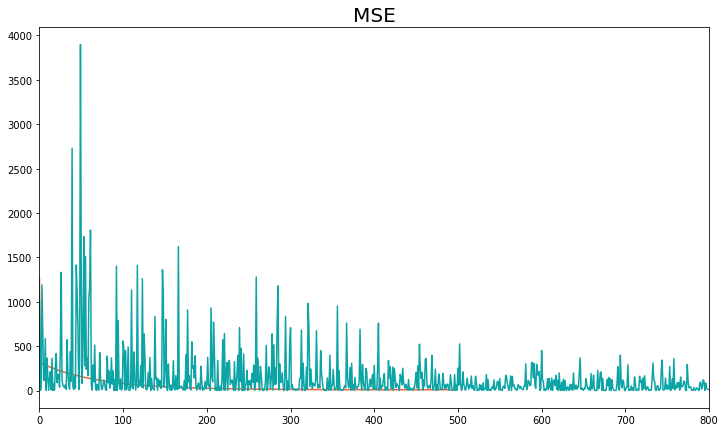

In [ ]:
# w_dg, errors_gd = gradient_descent(X, y, learning_rate=95e-5, log=False)
# w_sdg, errors_sgd = stochastic_gradient_descent(X, y, learning_rate=95e-5, log=False)
plt.figure(figsize = (12, 7))

plt.plot(range(len(errors_gd)), errors_gd, c='#F46036')
plt.plot(range(len(errors_sgd)), errors_sgd, c='#0CA4A5')
plt.xlim(0, 800)
# plt.ylim(0, 500)
plt.title('MSE', size=20)

Градиентный спуск сходится за меньшее количество итераций и отрабатывает быстрее, чем Стохастический градиентный спуск